In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electricity-consumption/train.csv
/kaggle/input/electricity-consumption/test.csv


In [2]:
!pip install DataScienceHelper

  Created wheel for DataScienceHelper: filename=datasciencehelper-1.5.2-py3-none-any.whl size=5727 sha256=6aaeddf275658cdbca7b7f0564ea1b409583a584d2286b32b46d052c0b3399ae
  Stored in directory: /root/.cache/pip/wheels/49/5e/d2/84a664218a270ce173c1d02086f556367a00002afe0aae6409
Successfully built DataScienceHelper
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [3]:
!pip install --upgrade pip

     |████████████████████████████████| 1.5 MB 402 kB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 20.2.1
    Uninstalling pip-20.2.1:
      Successfully uninstalled pip-20.2.1


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import DataScienceHelper as dsh
import plotly.express as px
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

%matplotlib inline

In [5]:
import time
from datetime import datetime
import re
from math import *

In [6]:
data = pd.read_csv("/kaggle/input/electricity-consumption/train.csv")
data.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0


In [7]:
data.tail()

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
26491,34891,2017-06-23 19:00:00,-0.7,-15.0,1009.0,51.685,A,225.0
26492,34892,2017-06-23 20:00:00,-2.9,-11.4,1005.0,56.105,A,213.0
26493,34893,2017-06-23 21:00:00,-1.4,-12.9,995.0,61.275,A,213.0
26494,34894,2017-06-23 22:00:00,-2.9,-11.4,996.0,67.210,A,210.0
26495,34895,2017-06-23 23:00:00,-2.1,-11.4,1009.0,71.880,A,210.0


In [8]:
data.isnull().sum()

ID                         0
datetime                   0
temperature                0
var1                       0
pressure                   0
windspeed                  0
var2                       0
electricity_consumption    0
dtype: int64

In [9]:
data.describe()

,ID,temperature,var1,pressure,windspeed,electricity_consumption
count,26496.000000,26496.000000,26496.000000,26496.000000,26496.000000,26496.000000
mean,17455.500000,5.098989,-1.916233,986.450615,23.959956,298.359601
std,10122.873673,8.682860,10.424860,12.002647,48.280321,108.020555
min,0.000000,-17.100000,-32.900000,953.000000,1.075000,174.000000
25%,8717.750000,-2.900000,-10.700000,978.000000,3.155000,219.000000
50%,17435.500000,6.400000,-1.400000,986.000000,6.545000,267.000000
75%,26177.250000,12.100000,7.900000,995.000000,22.260000,342.000000
max,34895.000000,23.600000,18.600000,1024.000000,586.600000,1386.000000


In [10]:
data.count()

ID                         26496
datetime                   26496
temperature                26496
var1                       26496
pressure                   26496
windspeed                  26496
var2                       26496
electricity_consumption    26496
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       26496 non-null  int64  
 1   datetime                 26496 non-null  object 
 2   temperature              26496 non-null  float64
 3   var1                     26496 non-null  float64
 4   pressure                 26496 non-null  float64
 5   windspeed                26496 non-null  float64
 6   var2                     26496 non-null  object 
 7   electricity_consumption  26496 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.6+ MB


In [12]:
data.memory_usage()

Index                         128
ID                         211968
datetime                   211968
temperature                211968
var1                       211968
pressure                   211968
windspeed                  211968
var2                       211968
electricity_consumption    211968
dtype: int64

In [13]:
data.windspeed.value_counts()

2.265      380
1.890      369
2.015      359
2.390      354
2.140      347
          ... 
318.210      1
123.435      1
282.485      1
160.465      1
27.825       1
Name: windspeed, Length: 5603, dtype: int64

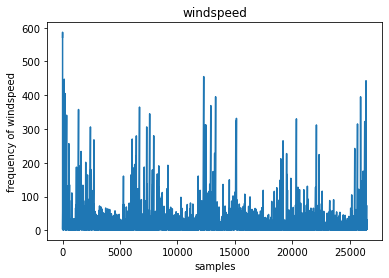

In [14]:
plott = data.windspeed
plt.plot(plott)
plt.xlabel("samples")
plt.ylabel("frequency of windspeed")
plt.title("windspeed")
plt.show()

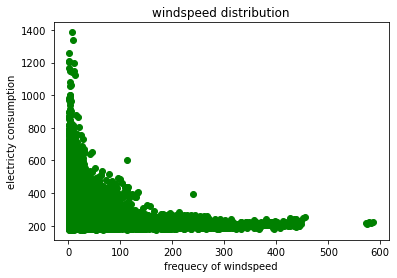

In [15]:
plt.scatter(data.windspeed,data.electricity_consumption,c='green')
plt.xlabel("frequecy of windspeed")
plt.ylabel("electricty consumption")
plt.title("windspeed distribution")
plt.show()

In [16]:
average = round(data.windspeed.mean(),3)
max_windspeed = round(max(data.windspeed),3)
min_windspeed = round(min(data.windspeed),3) 
print(f'The average windspeed is : {average} ')
print(f'The maximum windspeed is : {max_windspeed}')
print(f'The minimum windspeed is : {min_windspeed}')

The average windspeed is : 23.96 
The maximum windspeed is : 586.6
The minimum windspeed is : 1.075


In [17]:
avg_pressure = round(data.pressure.mean(),3)
max_pressure = round(data.pressure.max(),3)
min_pressure = round(data.pressure.min(),3)
print(f'The average pressure is : {avg_pressure}')
print(f'The maximum pressure is : {max_pressure}')
print(f'The minimum pressure is : {min_pressure}')

The average pressure is : 986.451
The maximum pressure is : 1024.0
The minimum pressure is : 953.0


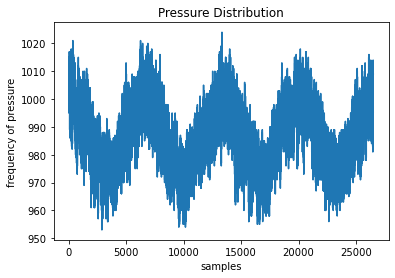

In [18]:
plt.plot(data.pressure)
plt.xlabel("samples")
plt.ylabel("frequency of pressure")
plt.title("Pressure Distribution")
plt.show()

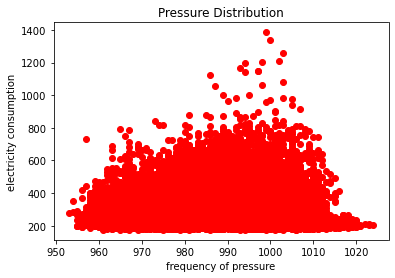

In [19]:
plt.scatter(data.pressure,data.electricity_consumption,c='red')
plt.xlabel("frequency of pressure")
plt.ylabel("electricity consumption")
plt.title("Pressure Distribution")
plt.show()

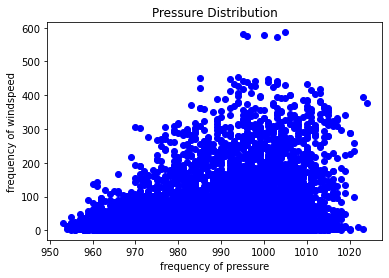

In [20]:
plt.scatter(data.pressure,data.windspeed,c='blue')
plt.xlabel("frequency of pressure")
plt.ylabel("frequency of windspeed")
plt.title("Pressure Distribution")
plt.show()

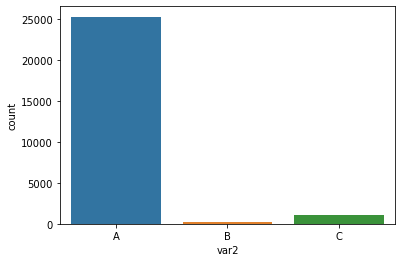

In [21]:
sns.countplot(x='var2',data = data)

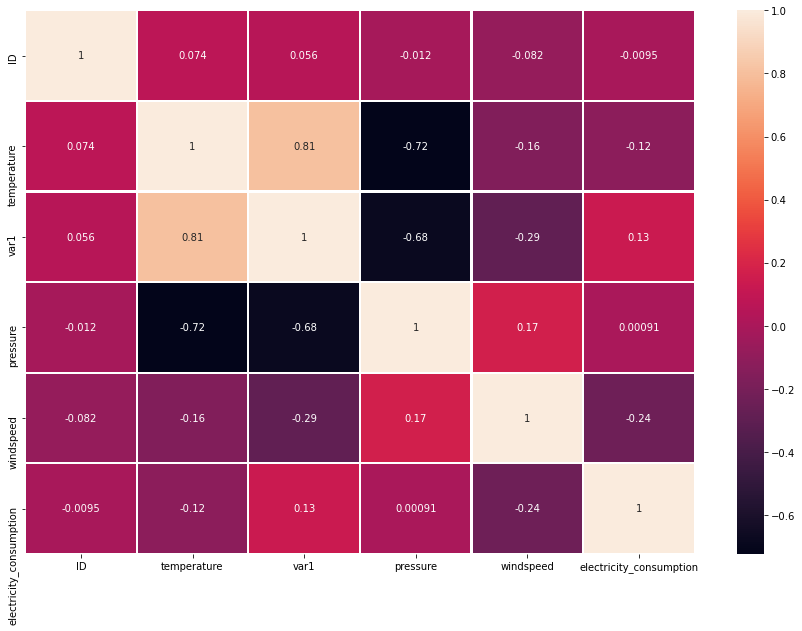

In [43]:
fig,ax = plt.subplots(figsize = (15,10))
corr = data.corr()
sns.heatmap(corr,xticklabels = corr.columns,annot = True,yticklabels = corr.columns,linewidth =1.2)

In [23]:
corr[abs(corr['electricity_consumption']) > 0.1]['electricity_consumption']

temperature               -0.117254
var1                       0.133914
windspeed                 -0.238883
electricity_consumption    1.000000
Name: electricity_consumption, dtype: float64

In [24]:
data.var1.value_counts()

 10.0    836
 8.6     809
 10.7    797
 7.9     779
 9.3     770
        ... 
-29.3      3
 17.9      2
-32.9      1
 18.6      1
-32.1      1
Name: var1, Length: 71, dtype: int64

In [25]:
data.var2.value_counts()

A    25239
C     1040
B      217
Name: var2, dtype: int64

**NEW TERM**

In [26]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,26496.0,17455.500000,10122.873673,0.000,8717.750,17435.500,26177.25,34895.0
temperature,26496.0,5.098989,8.682860,-17.100,-2.900,6.400,12.10,23.6
var1,26496.0,-1.916233,10.424860,-32.900,-10.700,-1.400,7.90,18.6
pressure,26496.0,986.450615,12.002647,953.000,978.000,986.000,995.00,1024.0
windspeed,26496.0,23.959956,48.280321,1.075,3.155,6.545,22.26,586.6
electricity_consumption,26496.0,298.359601,108.020555,174.000,219.000,267.000,342.00,1386.0


In [27]:
data.head().T

,0,1,2,3,4
ID,0,1,2,3,4
datetime,2013-07-01 00:00:00,2013-07-01 01:00:00,2013-07-01 02:00:00,2013-07-01 03:00:00,2013-07-01 04:00:00
temperature,-11.4,-12.1,-12.9,-11.4,-11.4
var1,-17.1,-19.3,-20,-17.1,-19.3
pressure,1003,996,1000,995,1005
windspeed,571.91,575.04,578.435,582.58,586.6
var2,A,A,A,A,A
electricity_consumption,216,210,225,216,222


In [28]:
data1 = (data
         .set_index(pd.to_datetime(data.datetime))
         .sort_index()
         .rename(columns={'var1':'dewpnt','var2':'peak_deamand'})
         .drop(columns = ['ID','datetime'])
        )

In [29]:
data1.head().T

datetime,2013-07-01 00:00:00,2013-07-01 01:00:00,2013-07-01 02:00:00,2013-07-01 03:00:00,2013-07-01 04:00:00
temperature,-11.4,-12.1,-12.9,-11.4,-11.4
dewpnt,-17.1,-19.3,-20,-17.1,-19.3
pressure,1003,996,1000,995,1005
windspeed,571.91,575.04,578.435,582.58,586.6
peak_deamand,A,A,A,A,A
electricity_consumption,216,210,225,216,222


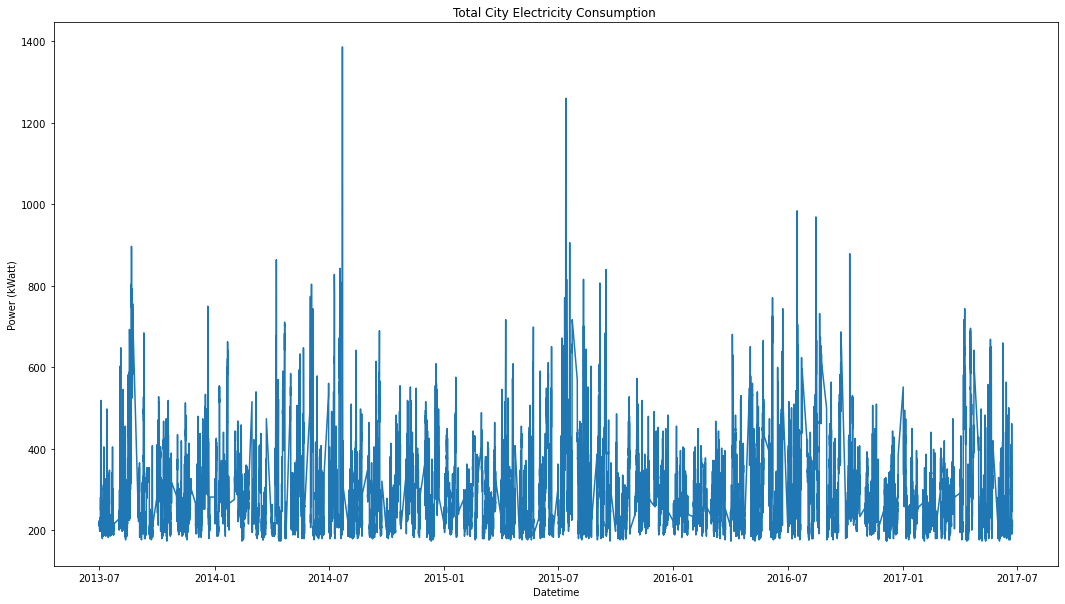

In [30]:
fig = plt.figure(figsize=(18,10))
axis = fig.gca()
axis.plot(data1.electricity_consumption)
axis.set_title('Total City Electricity Consumption ')
axis.set_ylabel('Power (kWatt)')
axis.set_xlabel('Datetime')
plt.show()

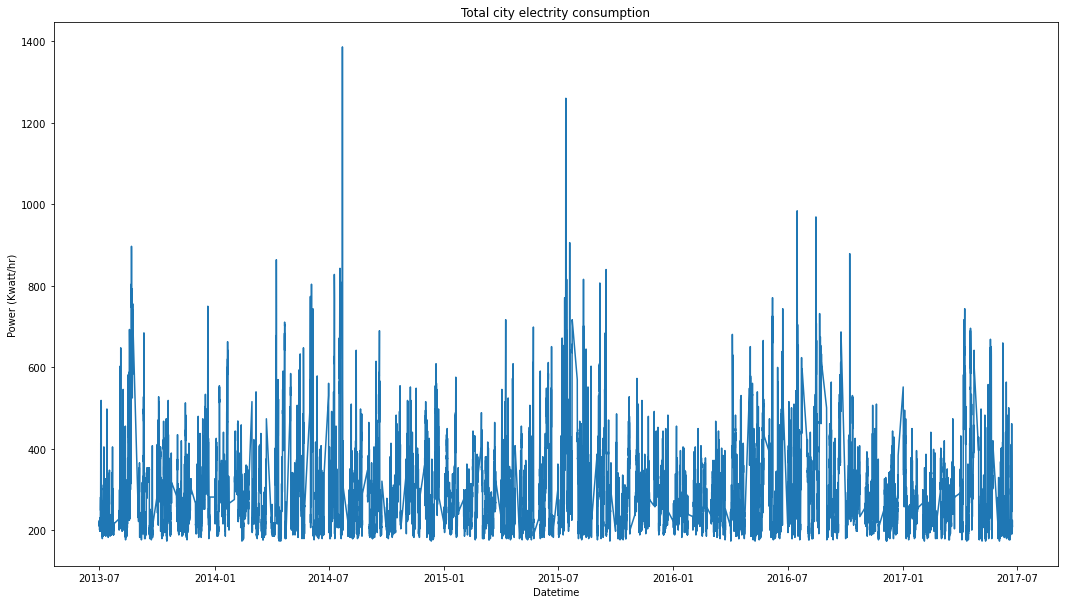

In [31]:
fig = plt.figure(figsize=(18,10))
plt.title("Total city electrity consumption")
plt.xlabel("Datetime")
plt.ylabel("Power (Kwatt/hr)")
plt.plot(data1.electricity_consumption)
plt.show()

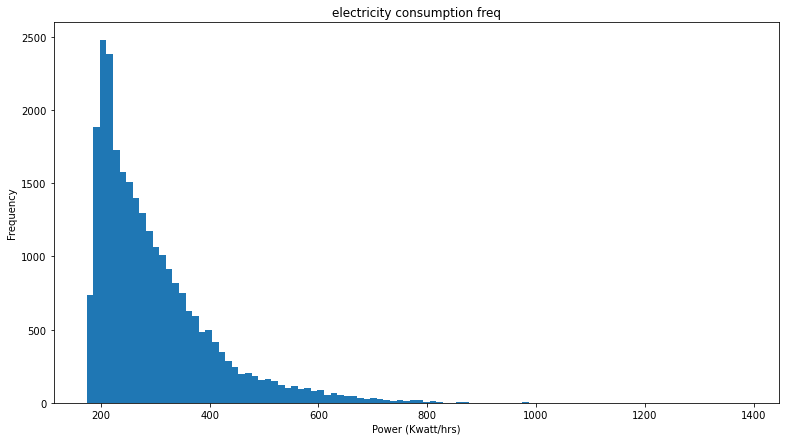

In [32]:
fig = data1['electricity_consumption'].plot.hist(figsize=(13,7),title="electricity consumption freq",bins= 100)
plt.xlabel("Power (Kwatt/hrs)")
plt.show()

In [33]:
data1 = (data1.assign(dayofweek = data1.index.week ,
                      year = data1.index.year,
                      month = data1.index.month,
                      day = data1.index.day,
                      week = data1.index.week,
                      week_day = data1.index.weekday,
                      quarter = data1.index.quarter,
                      hours = data1.index.hour                      
))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """


In [34]:
data1.head()

,temperature,dewpnt,pressure,windspeed,peak_deamand,electricity_consumption,dayofweek,year,month,day,week,week_day,quarter,hours
datetime,,,,,,,,,,,,,,
2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0,27,2013,7,1,27,0,3,0
2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0,27,2013,7,1,27,0,3,1
2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0,27,2013,7,1,27,0,3,2
2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0,27,2013,7,1,27,0,3,3
2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0,27,2013,7,1,27,0,3,4


In [35]:
data1.tail()

,temperature,dewpnt,pressure,windspeed,peak_deamand,electricity_consumption,dayofweek,year,month,day,week,week_day,quarter,hours
datetime,,,,,,,,,,,,,,
2017-06-23 19:00:00,-0.7,-15.0,1009.0,51.685,A,225.0,25,2017,6,23,25,4,2,19
2017-06-23 20:00:00,-2.9,-11.4,1005.0,56.105,A,213.0,25,2017,6,23,25,4,2,20
2017-06-23 21:00:00,-1.4,-12.9,995.0,61.275,A,213.0,25,2017,6,23,25,4,2,21
2017-06-23 22:00:00,-2.9,-11.4,996.0,67.210,A,210.0,25,2017,6,23,25,4,2,22
2017-06-23 23:00:00,-2.1,-11.4,1009.0,71.880,A,210.0,25,2017,6,23,25,4,2,23


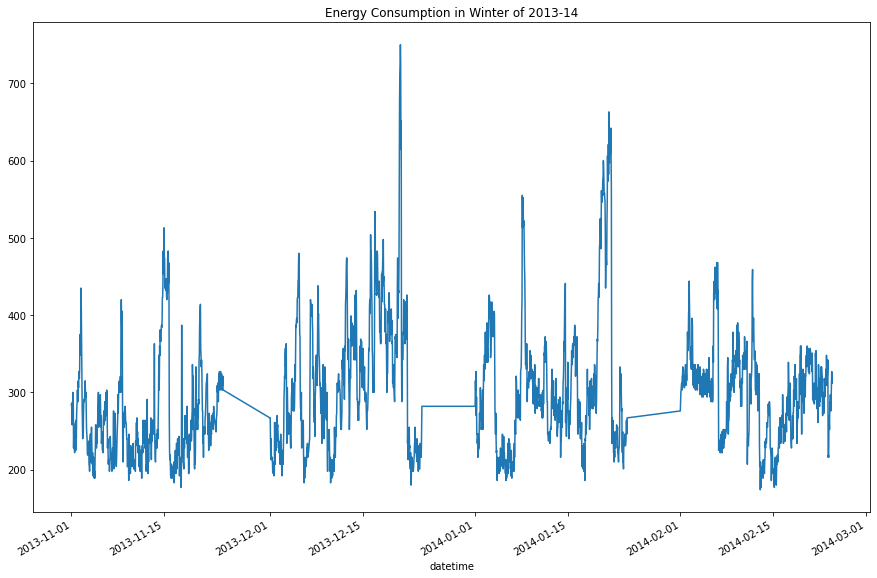

In [36]:
fig = (data1['electricity_consumption'].loc[(data1['electricity_consumption'].index >= '2013-11-01') & 
                                            (data1['electricity_consumption'].index < "2014-03-01") ] .plot(figsize = (15,10),title='Energy Consumption in Winter of 2013-14'))
plt.show()


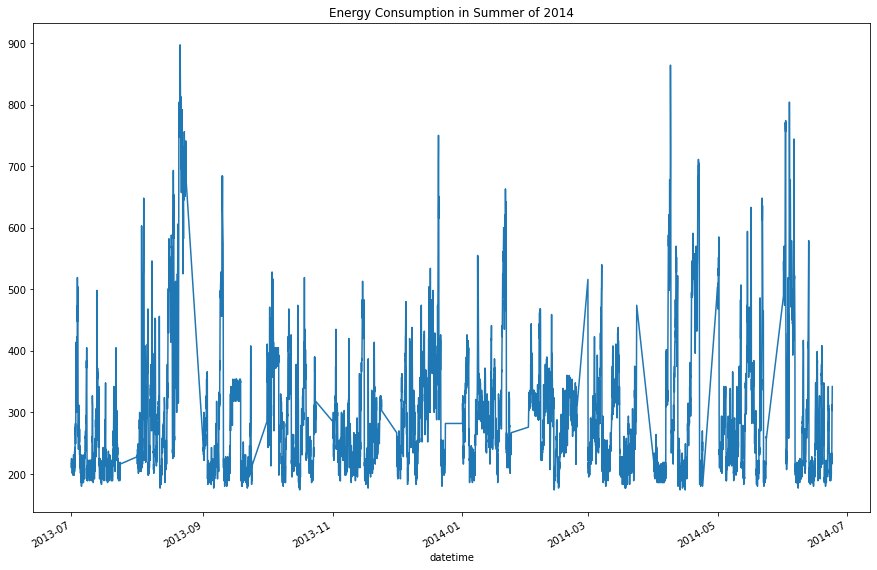

In [37]:
fig = (data1['electricity_consumption'].loc[(data1['electricity_consumption'].index >= '2013-03-01') & 
                                            (data1['electricity_consumption'].index < "2014-07-01") ] .plot(figsize = (15,10),title='Energy Consumption in Summer of 2014'))
plt.show()


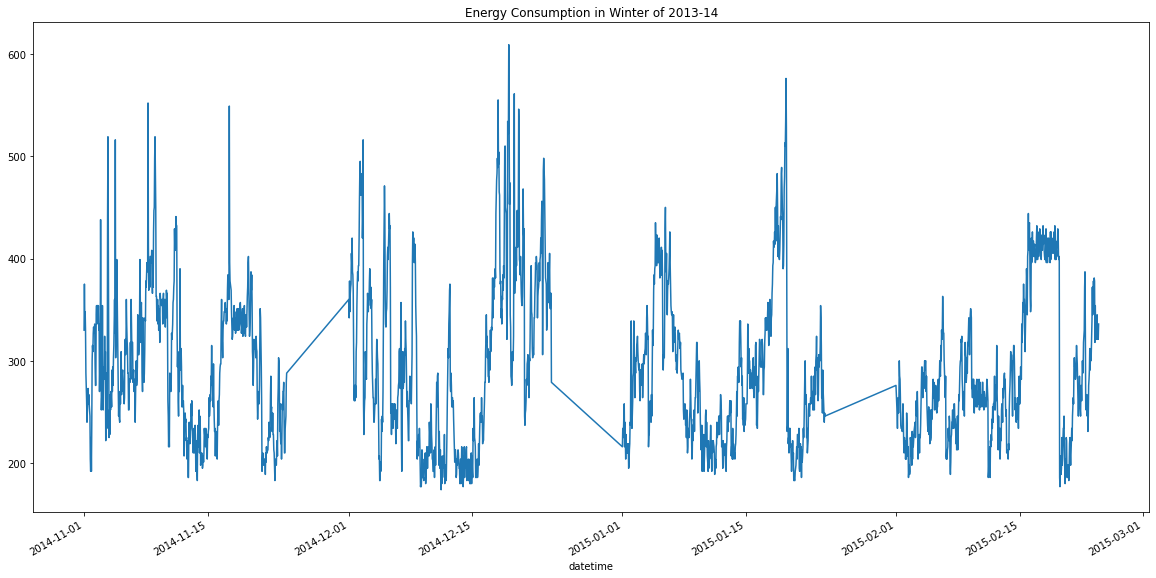

In [38]:
fig = (data1['electricity_consumption'].loc[(data1['electricity_consumption'].index >= '2014-11-01') & 
                                            (data1['electricity_consumption'].index < "2015-03-01") ] .plot(figsize = (20,10),title='Energy Consumption in Winter of 2013-14'))
plt.show()


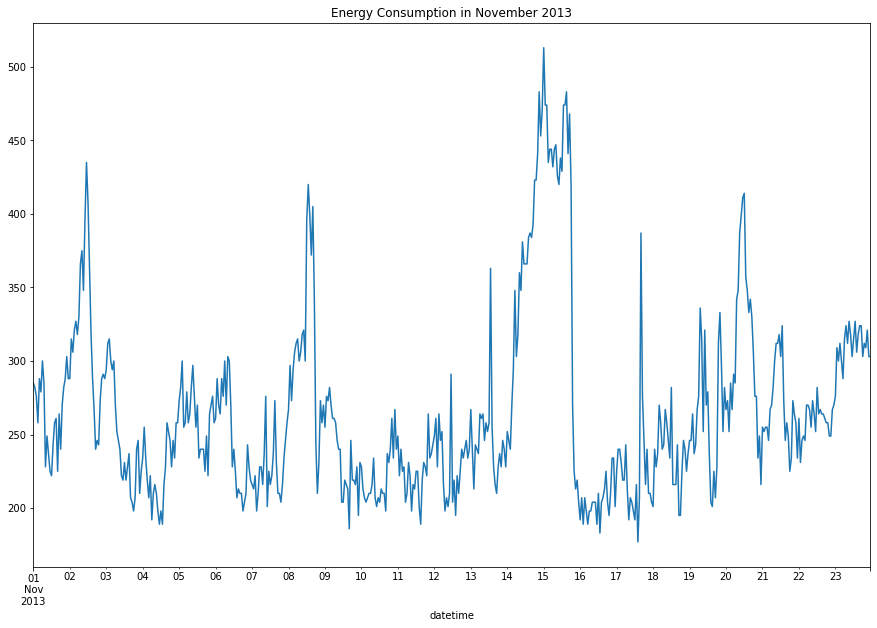

In [39]:
fig = (data1['electricity_consumption'].loc[(data1['electricity_consumption'].index >= '2013-11-01') & 
                                            (data1['electricity_consumption'].index < "2013-12-01") ] .plot(figsize = (15,10),title='Energy Consumption in November 2013'))
plt.show()


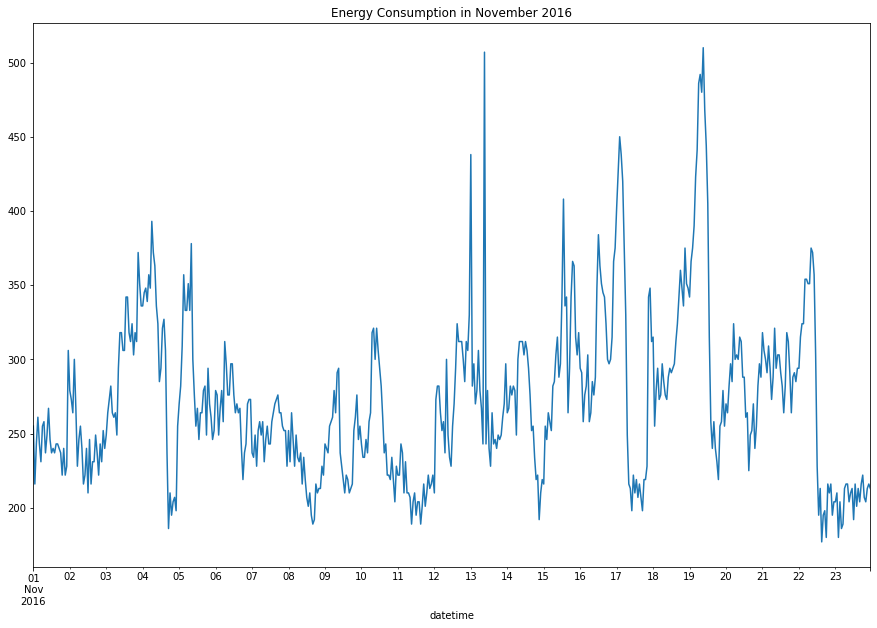

In [40]:
fig = (data1['electricity_consumption'].loc[(data1['electricity_consumption'].index >= '2016-11-01') & 
                                            (data1['electricity_consumption'].index < "2016-12-01") ] .plot(figsize = (15,10),title='Energy Consumption in November 2016'))
plt.show()

In [44]:
data1.head()

,temperature,dewpnt,pressure,windspeed,peak_deamand,electricity_consumption,dayofweek,year,month,day,week,week_day,quarter,hours
datetime,,,,,,,,,,,,,,
2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0,27,2013,7,1,27,0,3,0
2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0,27,2013,7,1,27,0,3,1
2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0,27,2013,7,1,27,0,3,2
2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0,27,2013,7,1,27,0,3,3
2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0,27,2013,7,1,27,0,3,4


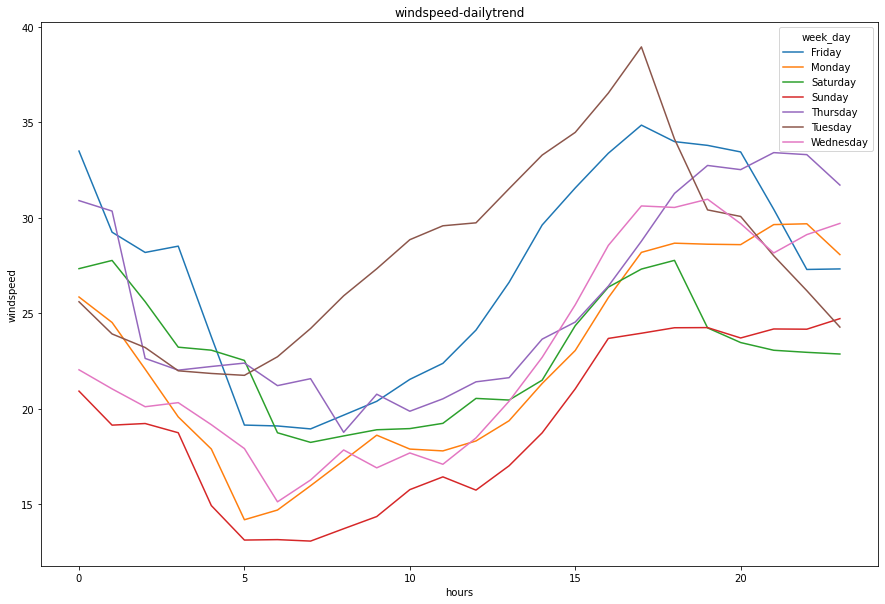

In [50]:
fig =data1.pivot_table(index = data1['hours'],
                       columns = 'week_day',
                       values = 'windspeed',
                       aggfunc = 'mean').plot(figsize = (15,10),title = 'windspeed-dailytrend')
plt.ylabel("windspeed")
plt.show()

In [48]:
data1 = data1.replace({"week_day" :{0 :"Monday",1 :"Tuesday",2 : "Wednesday",3 : "Thursday",4 :"Friday",5 :"Saturday",6 :"Sunday" }})

In [49]:
data1.head()

,temperature,dewpnt,pressure,windspeed,peak_deamand,electricity_consumption,dayofweek,year,month,day,week,week_day,quarter,hours
datetime,,,,,,,,,,,,,,
2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0,27,2013,7,1,27,Monday,3,0
2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0,27,2013,7,1,27,Monday,3,1
2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0,27,2013,7,1,27,Monday,3,2
2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0,27,2013,7,1,27,Monday,3,3
2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0,27,2013,7,1,27,Monday,3,4


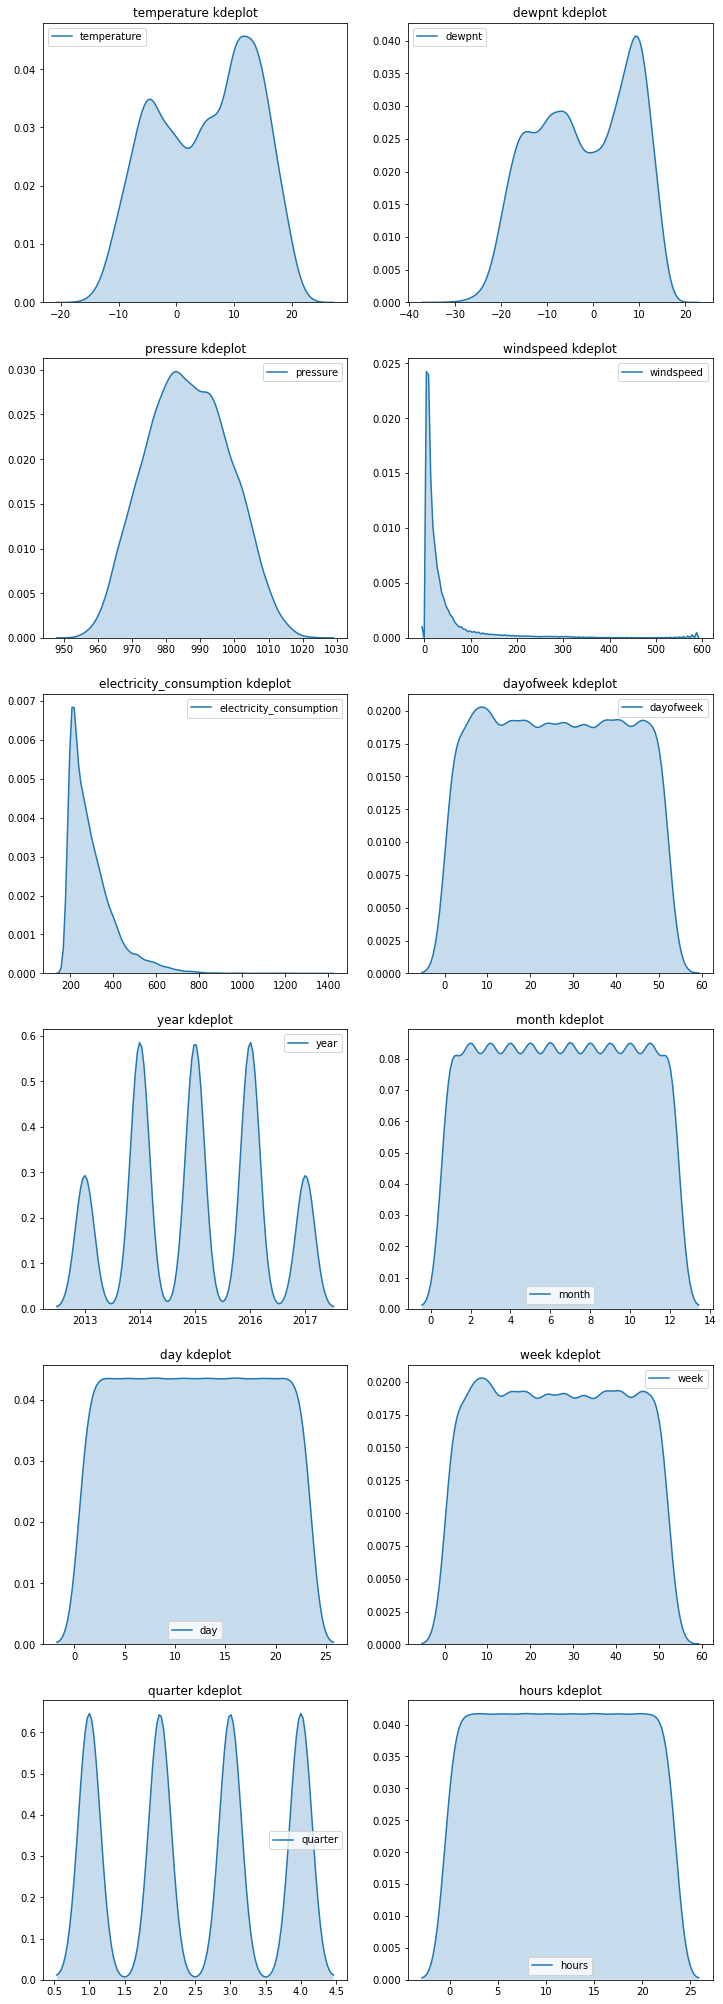

In [51]:
columns = list(data1._get_numeric_data().keys())
dsh.show_kdeplot(data1,columns)

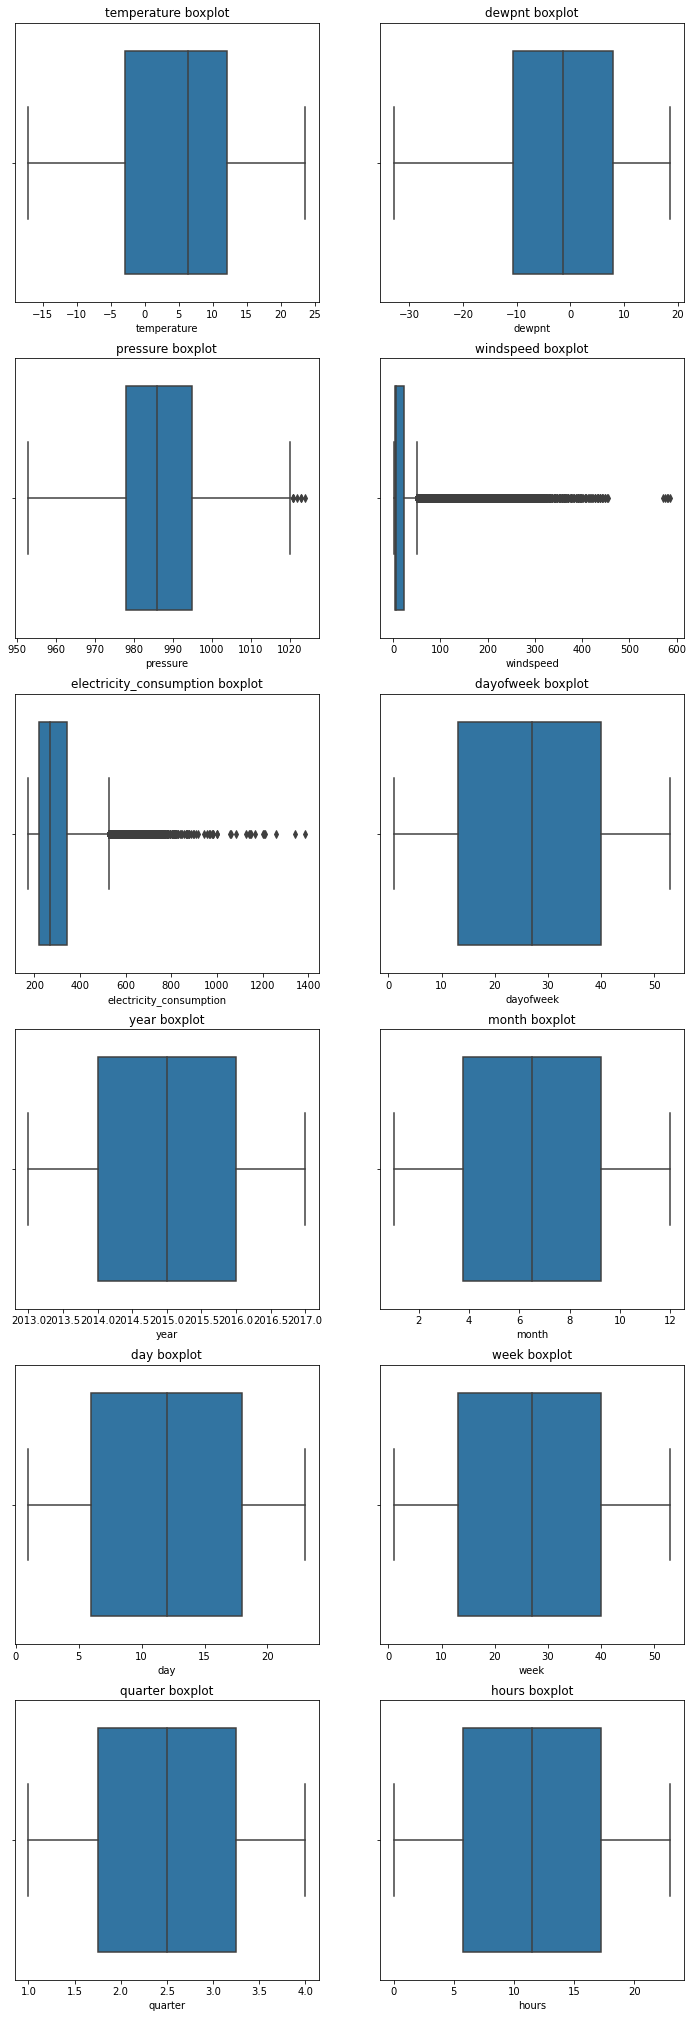

In [52]:
columns = list(data1._get_numeric_data().keys())
dsh.show_boxplot(data1,columns)